In [1]:
import glob
import os

import matplotlib.pyplot as plt
from monai.config import print_config
from monai.data import DataLoader, Dataset
from monai.transforms import (
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    ScaleIntensityRanged,
    Spacingd,
)
from monai.utils import first, set_determinism

print_config()

MONAI version: 1.3.0
Numpy version: 1.26.0
Pytorch version: 2.1.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: /Users/<username>/miniconda3/envs/cv/lib/python3.11/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.20.0
scipy version: 1.10.1
Pillow version: 10.1.0
Tensorboard version: NOT INSTALLED or UNKNOWN VERSION.
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.6
pandas version: NOT INSTALLED or UNKNOWN VERSION.
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INS

In [90]:
data_dir = "../data/data1207"
train_images = sorted(glob.glob(os.path.join(data_dir, "origin_data", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "roi_ras", "*.nii.gz")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
# print(len(data_dicts))
train_files, val_files = data_dicts[:-20], data_dicts[-20:]

In [82]:
data_dir = "../data/Task09_Spleen"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*.nii.gz")))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-9], data_dicts[-9:]

In [91]:
set_determinism(seed=0)
print(train_files)

[{'image': '../data/data1207/origin_data/00189740V.nii.gz', 'label': '../data/data1207/roi_ras/00189740_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/00197027V.nii.gz', 'label': '../data/data1207/roi_ras/00197027_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/00197876V.nii.gz', 'label': '../data/data1207/roi_ras/00197876_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/00204535V.nii.gz', 'label': '../data/data1207/roi_ras/00204535_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/00205328V.nii.gz', 'label': '../data/data1207/roi_ras/00205328_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/00205567V.nii.gz', 'label': '../data/data1207/roi_ras/00205567_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/00205740V.nii.gz', 'label': '../data/data1207/roi_ras/00205740_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/00205831V.nii.gz', 'label': '../data/data1207/roi_ras/00205831_Merge.nii.gz'}, {'image': '../data/data1207/origin_data/0020585

In [92]:
val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-57,
            a_max=164,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        # CropForegroundd(keys=["image", "label"], source_key="image"),
        Orientationd(keys=["image","label"],axcodes="RAS"),
        # Orientationd(keys=["image", "label"], as_closest_canonical=True),
        # Spacingd(keys=["image", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "nearest")),
        # RandCropByPosNegLabeld(
        #     keys=["image", "label"],
        #     label_key="label",
        #     spatial_size=(96, 96, 96),
        #     pos=1,
        #     neg=1,
        #     num_samples=4,
        #     image_key="image",
        #     image_threshold=0,
        # ),
    ]
)

torch.Size([1, 1, 512, 512, 34])
torch.Size([1, 1, 512, 512, 34])
image shape: torch.Size([512, 512, 34]), label shape: torch.Size([512, 512, 34])


IndexError: index 80 is out of bounds for dimension 2 with size 34

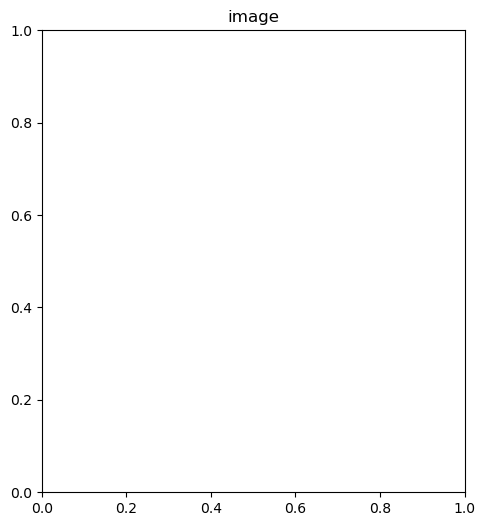

In [93]:
check_ds = Dataset(data=val_files, transform=val_transforms)
check_loader = DataLoader(check_ds, batch_size=1)
check_data = first(check_loader)
print(check_loader)
print(check_data["image"].shape)
print(check_data["label"].shape)
image, label = (check_data["image"][0][0], check_data["label"][0][0])
print(f"image shape: {image.shape}, label shape: {label.shape}")
# plot the slice [:, :, 80]
plt.figure("check", (12, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[:, :, 80], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[:, :, 80])
plt.show()